# Predicting Turbine Energy yield (TEY) using ambient variables as features.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2
from keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## EDA 

In [3]:
#Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
# Changing position of target column 'TEY'
Target = data['TEY']

#Drop the existing column
data.drop(labels=['TEY'], axis=1, inplace = True)

#Insert the target column to first position
data.insert(0, 'TEY', Target)

#Preview of first 10 rows
data.head(10)

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
5,114.72,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,10.626,3.4467,82.409
6,114.71,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,10.644,3.4874,82.440
7,114.71,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,10.656,3.6043,83.010
8,114.72,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,10.644,3.3943,82.284
9,131.70,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,11.679,1.9081,82.782


In [5]:
#Checking the null values in dataset
data.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
#Checking the duplicate values/rows in dataset
data[data.duplicated()]

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX


In [7]:
data.shape

(15039, 11)

In [8]:
data.iloc[:, [0,1,2,3]].describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


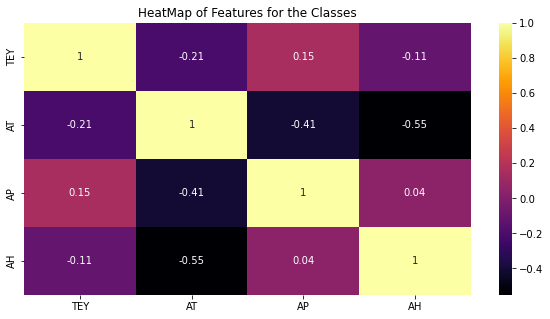

In [9]:
#Plotting heatmap for features
plt.figure(figsize=(10,5))
sns.heatmap(data.iloc[:, [0,1,2,3]].corr().round(2), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")
plt.show()

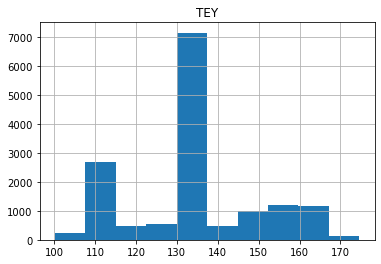

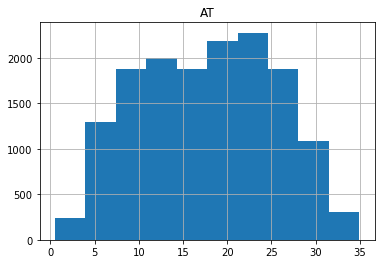

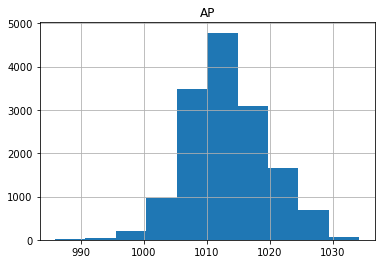

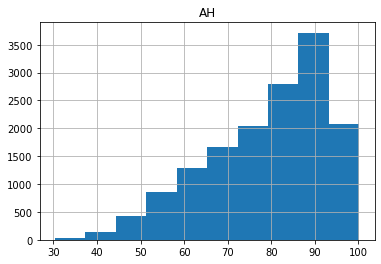

In [10]:
#Checking the distribution of data
col = data.columns[[0,1,2,3]]
for i in col:
    plt.hist(data[i])
    plt.title(i)
    plt.grid()
    plt.show()

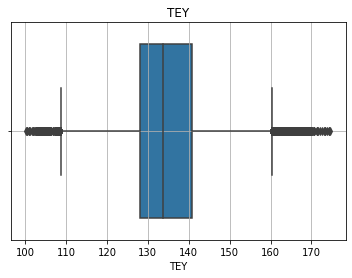

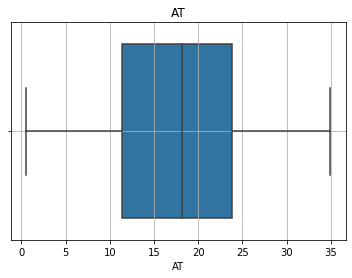

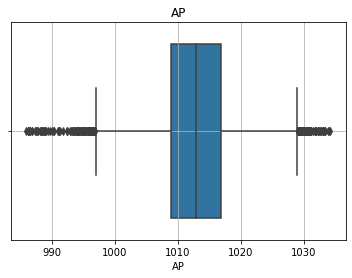

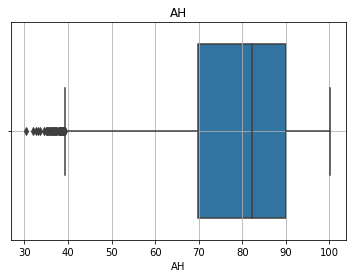

In [11]:
#Checking the outliers in dataset
col = data.columns[[0,1,2,3]]
for i in col:
    sns.boxplot(data[i])
    plt.title(i)
    plt.grid()
    plt.show()

In [12]:
#The boxplot shows that more input variables are outliers, so we'll use mean absolute error (MAE) to evaluate the model in modeling. The MAE is not sensitive to the outliers

## Splitting the dataset 

In [13]:
X = data.iloc[:, 1:4]
y = data.iloc[:, 0]

In [14]:
X.shape, y.shape

((15039, 3), (15039,))

## Feature Scaling 

In [15]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [16]:
y = scale.fit_transform(y.values.reshape(-1, 1))

In [17]:
y.shape, X.shape

((15039, 1), (15039, 3))

## Model Building 

### Building the Architecture 

In [18]:
model = Sequential()
model.add(Dense(units=10, input_dim = 3,kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

### Compile the Architecture 

In [19]:
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'])

## Model Training & Testing

In [20]:
hist = model.fit(X, y, batch_size=1000, epochs=50, validation_split=0.3)

Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 0.8742 - mean_absolute_error: 0.8742 - val_loss: 0.7859 - val_mean_absolute_error: 0.7859
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.8335 - mean_absolute_error: 0.8335 - val_loss: 0.7722 - val_mean_absolute_error: 0.7722
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.8089 - mean_absolute_error: 0.8089 - val_loss: 0.7642 - val_mean_absolute_error: 0.7642
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 0.7876 - mean_absolute_error: 0.7876 - val_loss: 0.7557 - val_mean_absolute_error: 0.7557
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7687 - mean_absolute_error: 0.7687 - val_loss: 0.7468 - val_mean_absolute_error: 0.7468
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.7520 - mean_absolute_error: 0.7520 - val_loss: 0.7388 - val_mean_absolute_error: 0.7388
Epoch 7/50
11/11 [=========

In [21]:
hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

## Model Evaluation 

In [22]:
scores = model.evaluate(X, y)

470/470 [==============================] - 1s 1ms/step - loss: 0.6946 - mean_absolute_error: 0.6946


### Visualizing the loss

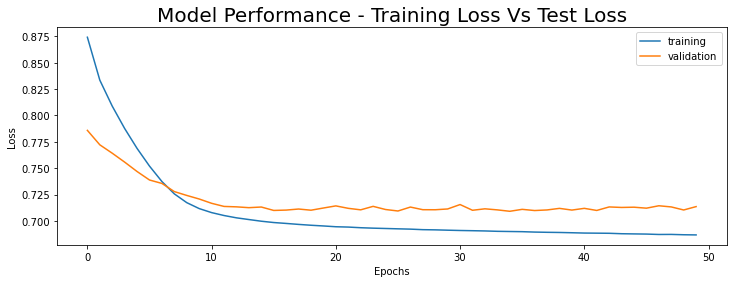

In [23]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the error 

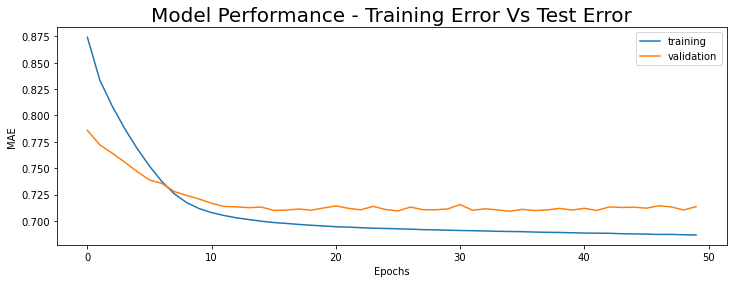

In [24]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["mean_absolute_error"],label="training")
plt.plot(hist.history["val_mean_absolute_error"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Model Performance - Training Error Vs Test Error',size = 20)
plt.show()

#### Conclusion:
**As we can see, that validation loss is quite higher than training and also the validation accuracy is low compared to training accuracy. Hence, we will try to optimise the loss and improve accuracy by tuning some optimisers for model.**

## Tuning Optimisers for improving the performance of model 

In [25]:
#Selecting Adam as Optimiser for our model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])

## Model Training & Testing

In [26]:
hist = model.fit(X, y, batch_size=1000, epochs=50, validation_split=0.3)

Epoch 1/50
11/11 [==============================] - 1s 22ms/step - loss: 0.6938 - mean_absolute_error: 0.6938 - val_loss: 0.7237 - val_mean_absolute_error: 0.7237
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - val_loss: 0.7218 - val_mean_absolute_error: 0.7218
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6872 - mean_absolute_error: 0.6872 - val_loss: 0.7194 - val_mean_absolute_error: 0.7194
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6842 - mean_absolute_error: 0.6842 - val_loss: 0.7162 - val_mean_absolute_error: 0.7162
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6827 - mean_absolute_error: 0.6827 - val_loss: 0.7141 - val_mean_absolute_error: 0.7141
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - val_loss: 0.7212 - val_mean_absolute_error: 0.7212
Epoch 7/50
11/11 [=========

In [27]:
hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

## Model Evaluation 

In [28]:
scores = model.evaluate(X, y)

470/470 [==============================] - 1s 1ms/step - loss: 0.6806 - mean_absolute_error: 0.6806


### Visualizing the loss

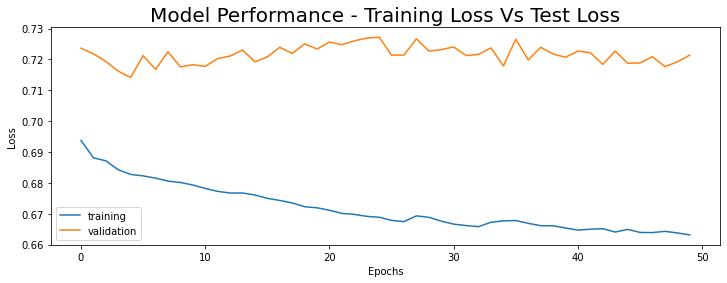

In [29]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the error

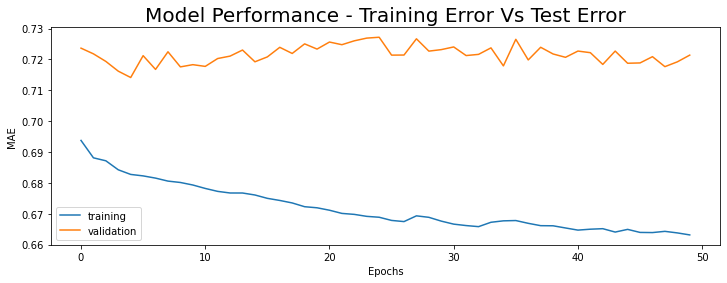

In [30]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["mean_absolute_error"],label="training")
plt.plot(hist.history["val_mean_absolute_error"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Model Performance - Training Error Vs Test Error',size = 20)
plt.show()

#### Conclusion:
**As we can see, that there is an improvement in training & validation accuracy also the validation loss has been reduced compared to first model. Hence, we will try to optimise further the loss and improve accuracy by tuning optimisers for the model.**

## Tuning Optimisers for further improving the performance of model 

In [31]:
#Selecting Nadam as Optimiser for our model
opt = keras.optimizers.Nadam(learning_rate=0.01)
model.compile(optimizer= opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])

## Model Training & Testing

In [32]:
hist = model.fit(X, y, batch_size=51, epochs=20, validation_split=0.3)

Epoch 1/20
207/207 [==============================] - 1s 2ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - val_loss: 0.7210 - val_mean_absolute_error: 0.7210
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6689 - mean_absolute_error: 0.6689 - val_loss: 0.7252 - val_mean_absolute_error: 0.7252
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6675 - mean_absolute_error: 0.6675 - val_loss: 0.7268 - val_mean_absolute_error: 0.7268
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6661 - mean_absolute_error: 0.6661 - val_loss: 0.7233 - val_mean_absolute_error: 0.7233
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6660 - mean_absolute_error: 0.6660 - val_loss: 0.7262 - val_mean_absolute_error: 0.7262
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - val_loss: 0.7192 - val_mean_absolute_error: 0.7192
Epoch 7/20
207/2

In [33]:
hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

## Model Evaluation 

In [34]:
scores = model.evaluate(X, y)

470/470 [==============================] - 1s 1ms/step - loss: 0.6778 - mean_absolute_error: 0.6778


### Visualizing the loss

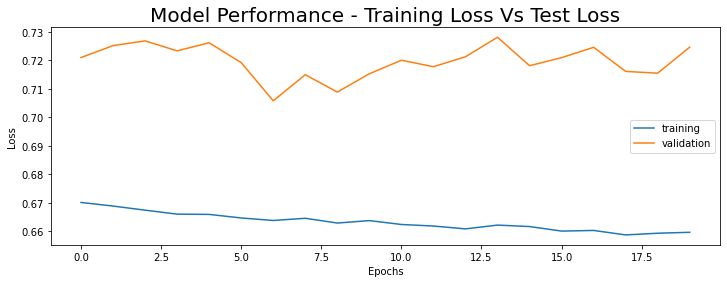

In [35]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the error 

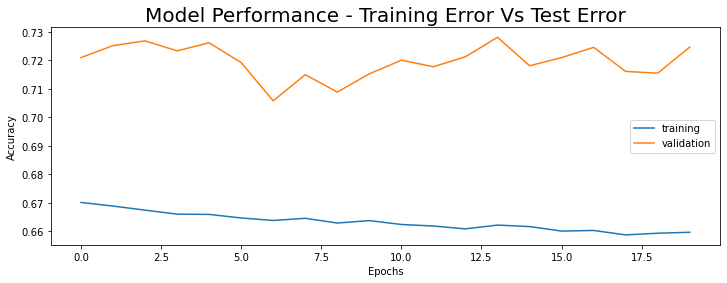

In [37]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["mean_absolute_error"],label="training")
plt.plot(hist.history["val_mean_absolute_error"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance - Training Error Vs Test Error',size = 20)
plt.show()

#### Conclusion:
**As we can see, that training & validation loss are stagnant throughout with "NADAM" optimisers, so as the accuracy. So, NADAM optimiser is not a good choice as optimiser for our model.**

### Hyper-Parameter Tuning
* Batch & Epoch
* Activation, Optimiser, Learning rate, layers, dropout

#### Determining the best Batch & Epoch for our model

In [38]:
#We will create a function for our model for tuning
def create_model():
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(units=12, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='linear'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

In [39]:
#As you can see, we have selected "Adam" as optimiser because it gave the best results w.r.t loss & accuracy.

In [40]:
#First we will select the best batch & epoch for our model

model = KerasRegressor(build_fn = create_model,verbose = 0)

size = [1000, 5000, 7500]
ep = [50,100,150]


param_grid = dict(batch_size = size,epochs = ep)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(n_splits=5, shuffle=True),verbose = 10)

grid_result = grid.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=1000, epochs=50..................................
[CV 1/5; 1/9] END ..batch_size=1000, epochs=50;, score=-0.679 total time=   2.1s
[CV 2/5; 1/9] START batch_size=1000, epochs=50..................................
[CV 2/5; 1/9] END ..batch_size=1000, epochs=50;, score=-0.685 total time=   2.0s
[CV 3/5; 1/9] START batch_size=1000, epochs=50..................................
[CV 3/5; 1/9] END ..batch_size=1000, epochs=50;, score=-0.670 total time=   1.9s
[CV 4/5; 1/9] START batch_size=1000, epochs=50..................................
[CV 4/5; 1/9] END ..batch_size=1000, epochs=50;, score=-0.678 total time=   1.9s
[CV 5/5; 1/9] START batch_size=1000, epochs=50..................................
[CV 5/5; 1/9] END ..batch_size=1000, epochs=50;, score=-0.683 total time=   1.9s
[CV 1/5; 2/9] START batch_size=1000, epochs=100.................................
[CV 1/5; 2/9] END .batch_size=1000, epochs=100;, 

In [41]:
grid_result.best_params_

{'batch_size': 1000, 'epochs': 150}

In [42]:
grid_result.best_score_

-0.6742969870567321

## Artificial Neural Network Model - Tuning of All Hyperparameters
**As dataset contains too many records, it will take much time to get the results. So we will use only first 1000 records and try to tune the hyperparameters to get the best results.**

In [43]:
# Selecting first 1000 records
X_res = X[0:1000, :]

In [44]:
# Selecting first 1000 records
y_res = y[0:1000]

In [45]:
X_res.shape, y_res.shape

((1000, 3), (1000, 1))

In [46]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [100,500]
epochs = [100,150]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['glorot_uniform','normal', ]
neuron1 = [3,5]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(shuffle=True),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_res, y_res)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, init=glorot_uniform, learning_rate=0.01, neuron1=3, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, init=glorot_uniform, learning_rate=0.01, neuron1=3, neuron2=2;, score=-1.055 total time=   2.0s
[CV 2/5; 1/256] START activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, init=glorot_uniform, learning_rate=0.01, neuron1=3, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, init=glorot_uniform, learning_rate=0.01, neuron1=3, neuron2=2;, score=-1.150 total time=   2.0s
[CV 3/5; 1/256] START activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, init=glorot_uniform, learning_rate=0.01, neuron1=3, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=100, dropout_rate=0.1, epochs=100, 

In [47]:
grid_result.best_params_

{'activation_function': 'relu',
 'batch_size': 500,
 'dropout_rate': 0.1,
 'epochs': 150,
 'init': 'glorot_uniform',
 'learning_rate': 0.01,
 'neuron1': 5,
 'neuron2': 4}

In [48]:
grid_result.best_score_

-1.0783830137225623

## Building Final Model based on above parameters

In [266]:
final_model = Sequential()
final_model.add(Dense(3,input_dim = 3,kernel_initializer = 'he_uniform',activation = 'tanh'))
final_model.add(Dropout(0.01))
final_model.add(Dense(2,input_dim = 3,kernel_initializer = 'he_uniform',activation = 'tanh'))
final_model.add(Dropout(0.01))
final_model.add(Dense(1,activation = 'linear'))

In [267]:
opt = keras.optimizers.Nadam(learning_rate=0.03)
final_model.compile(optimizer= opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])

### Model Training & Testing

In [268]:
hist = final_model.fit(X, y, batch_size=1000, epochs=150, validation_split=0.3)

Epoch 1/150
11/11 [==============================] - 2s 39ms/step - loss: 0.8900 - mean_absolute_error: 0.8900 - val_loss: 0.7865 - val_mean_absolute_error: 0.7865
Epoch 2/150
11/11 [==============================] - 0s 8ms/step - loss: 0.7116 - mean_absolute_error: 0.7116 - val_loss: 0.7183 - val_mean_absolute_error: 0.7183
Epoch 3/150
11/11 [==============================] - 0s 9ms/step - loss: 0.6976 - mean_absolute_error: 0.6976 - val_loss: 0.7172 - val_mean_absolute_error: 0.7172
Epoch 4/150
11/11 [==============================] - 0s 7ms/step - loss: 0.6979 - mean_absolute_error: 0.6979 - val_loss: 0.7178 - val_mean_absolute_error: 0.7178
Epoch 5/150
11/11 [==============================] - 0s 10ms/step - loss: 0.6960 - mean_absolute_error: 0.6960 - val_loss: 0.7197 - val_mean_absolute_error: 0.7197
Epoch 6/150
11/11 [==============================] - 0s 8ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - val_loss: 0.7183 - val_mean_absolute_error: 0.7183
Epoch 7/150
11/11 [=

In [269]:
hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

### Model Evaluation 

In [270]:
scores = final_model.evaluate(X, y)

470/470 [==============================] - 1s 2ms/step - loss: 0.6805 - mean_absolute_error: 0.6805


### Visualizing the loss

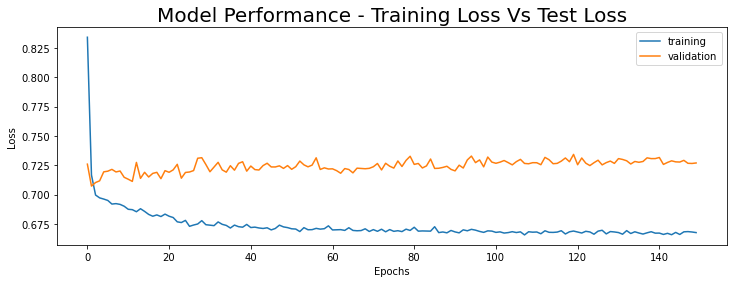

In [249]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["loss"],label="training")
plt.plot(hist.history["val_loss"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training Loss Vs Test Loss',size = 20)
plt.show()

### Visualizing the error

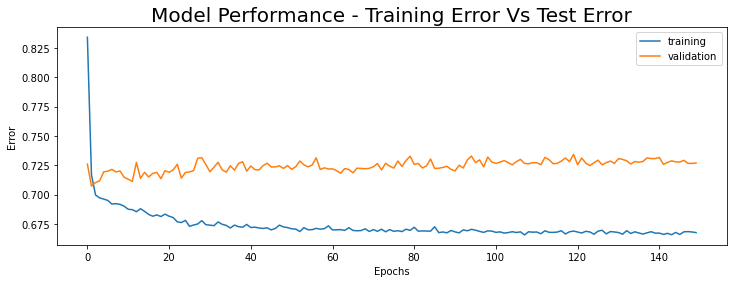

In [250]:
plt.figure(figsize=(12,4))
plt.plot(hist.history["mean_absolute_error"],label="training")
plt.plot(hist.history["val_mean_absolute_error"],label="validation")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Model Performance - Training Error Vs Test Error',size = 20)
plt.show()

# ===================================================